In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data=pd.read_excel("Data_Train.xlsx")

In [3]:
Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
Data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
Data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [6]:
Data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [7]:
[Data[x].unique() for x in Data.columns]

[array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
        'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
        'Vistara Premium economy', 'Jet Airways Business',
        'Multiple carriers Premium economy', 'Trujet'], dtype=object),
 array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
        '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
        '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
        '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
        '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
        '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
        '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
        '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
        '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
        '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object),
 array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mum

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
Data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
Data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [12]:
Data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [13]:
Data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [14]:
Data['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BLR → HBX → BOM → BHO → DEL             1
BLR → BOM → IXC → DEL                   1
BOM → JAI → DEL → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BLR → HBX → BOM → AMD → DEL             1
Name: Route, Length: 128, dtype: int64

In [15]:
Data['Route'].fillna('DEL ? BOM ? COK',inplace=True)

In [16]:
Data['Total_Stops'].fillna('1 stop',inplace=True)

In [17]:
Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [18]:
Data['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [19]:
pd.to_datetime(Data['Date_of_Journey']).dt.day

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Date_of_Journey, Length: 10683, dtype: int64

In [20]:
pd.to_datetime(Data['Date_of_Journey']).dt.month

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: Date_of_Journey, Length: 10683, dtype: int64

In [21]:
pd.to_datetime(Data['Date_of_Journey']).dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10683, dtype: int64

In [22]:
Data['Journey_Day']=pd.to_datetime(Data['Date_of_Journey']).dt.day

In [23]:
Data['Journey_Month']=pd.to_datetime(Data['Date_of_Journey']).dt.month

In [24]:
Data['Journey_Year']=pd.to_datetime(Data['Date_of_Journey']).dt.year

In [25]:
Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,2019


In [26]:
Data['Journey_Year'].unique()

array([2019], dtype=int64)

In [27]:
Data.drop('Journey_Year',axis=1,inplace=True)

In [28]:
Data.drop('Date_of_Journey',axis=1,inplace=True)

In [29]:
Data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [30]:
Data['Arrival_Hour']=pd.to_datetime(Data['Arrival_Time']).dt.hour

In [31]:
Data['Arrival_Min']=pd.to_datetime(Data['Arrival_Time']).dt.minute

In [32]:
Data.drop('Arrival_Time',axis=1,inplace=True)

In [33]:
Data

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,5,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,6,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,5,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,3,1,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,4,9,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,4,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,4,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,3,1,14,10


In [34]:
Data['Dept_Hour']=pd.to_datetime(Data['Dep_Time']).dt.hour

In [35]:
Data['Dept_Min']=pd.to_datetime(Data['Dep_Time']).dt.minute

In [36]:
Data.drop('Dep_Time',axis=1,inplace=True)

In [37]:
Data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,14,10,11,30


In [38]:
Data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10683, dtype: object

In [39]:
Duration_Hour=[]
Duration_Min=[]

In [40]:
Dur = list(Data["Duration"])
Dur 

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [41]:
Data['Duration'].str.split()

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10683, dtype: object

In [42]:
for i in range(len(Dur)):
    if len(Dur[i].split()) != 2:    
        if "h" in Dur[i]:
            Dur[i] = Dur[i] + " 0m"   
        else:
            Dur[i] = "0h " + Dur[i] 

In [43]:
Dur

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [44]:
for i in range(len(Dur)):
    Duration_Hour.append(Dur[i].split('h')[0])

In [45]:
Duration_Hour

['2',
 '7',
 '19',
 '5',
 '4',
 '2',
 '15',
 '21',
 '25',
 '7',
 '13',
 '2',
 '2',
 '12',
 '2',
 '26',
 '4',
 '22',
 '23',
 '20',
 '5',
 '15',
 '2',
 '2',
 '13',
 '15',
 '5',
 '5',
 '2',
 '2',
 '2',
 '13',
 '2',
 '22',
 '5',
 '10',
 '5',
 '2',
 '6',
 '11',
 '11',
 '8',
 '22',
 '2',
 '12',
 '2',
 '2',
 '2',
 '16',
 '19',
 '3',
 '25',
 '2',
 '3',
 '2',
 '16',
 '15',
 '2',
 '6',
 '25',
 '12',
 '27',
 '10',
 '10',
 '2',
 '10',
 '2',
 '1',
 '13',
 '2',
 '1',
 '26',
 '7',
 '13',
 '5',
 '2',
 '2',
 '1',
 '19',
 '2',
 '14',
 '2',
 '22',
 '9',
 '10',
 '21',
 '5',
 '18',
 '12',
 '18',
 '9',
 '11',
 '17',
 '13',
 '2',
 '2',
 '2',
 '3',
 '1',
 '16',
 '12',
 '12',
 '7',
 '24',
 '2',
 '8',
 '7',
 '14',
 '30',
 '19',
 '15',
 '2',
 '12',
 '10',
 '5',
 '15',
 '16',
 '10',
 '2',
 '11',
 '2',
 '1',
 '14',
 '20',
 '2',
 '23',
 '18',
 '16',
 '2',
 '2',
 '8',
 '16',
 '3',
 '2',
 '14',
 '23',
 '21',
 '21',
 '2',
 '10',
 '8',
 '8',
 '5',
 '8',
 '11',
 '27',
 '8',
 '20',
 '4',
 '8',
 '2',
 '24',
 '2',
 '12',
 

In [46]:
Data['Duration_Hour']=Duration_Hour

In [47]:
for i in range(len(Dur)):
    Duration_Min.append(Dur[i].split('m')[0].split()[-1])

In [48]:
Duration_Min

['50',
 '25',
 '0',
 '25',
 '45',
 '25',
 '30',
 '5',
 '30',
 '50',
 '15',
 '35',
 '15',
 '10',
 '35',
 '35',
 '30',
 '35',
 '0',
 '35',
 '10',
 '20',
 '50',
 '55',
 '20',
 '10',
 '45',
 '55',
 '50',
 '15',
 '15',
 '25',
 '50',
 '0',
 '30',
 '25',
 '15',
 '30',
 '15',
 '55',
 '5',
 '30',
 '5',
 '45',
 '0',
 '50',
 '50',
 '15',
 '5',
 '55',
 '15',
 '20',
 '50',
 '0',
 '50',
 '15',
 '5',
 '15',
 '30',
 '5',
 '25',
 '20',
 '15',
 '30',
 '15',
 '25',
 '50',
 '30',
 '20',
 '15',
 '25',
 '30',
 '20',
 '30',
 '0',
 '45',
 '50',
 '30',
 '5',
 '15',
 '50',
 '40',
 '10',
 '35',
 '0',
 '20',
 '25',
 '45',
 '20',
 '0',
 '15',
 '5',
 '30',
 '20',
 '35',
 '25',
 '40',
 '0',
 '25',
 '35',
 '20',
 '15',
 '30',
 '0',
 '45',
 '55',
 '10',
 '30',
 '20',
 '55',
 '0',
 '55',
 '45',
 '10',
 '55',
 '25',
 '5',
 '10',
 '40',
 '55',
 '40',
 '25',
 '5',
 '15',
 '25',
 '10',
 '10',
 '0',
 '50',
 '20',
 '0',
 '55',
 '10',
 '45',
 '0',
 '50',
 '40',
 '15',
 '45',
 '50',
 '0',
 '15',
 '25',
 '35',
 '50',
 '35',
 '2

In [49]:
Data['Duration_Min']=Duration_Min

In [50]:
Data.drop('Duration',inplace=True,axis=1)

In [51]:
Data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,14,10,11,30,2,40


In [52]:
"2HR 30MIN".split()

['2HR', '30MIN']

In [53]:
Data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

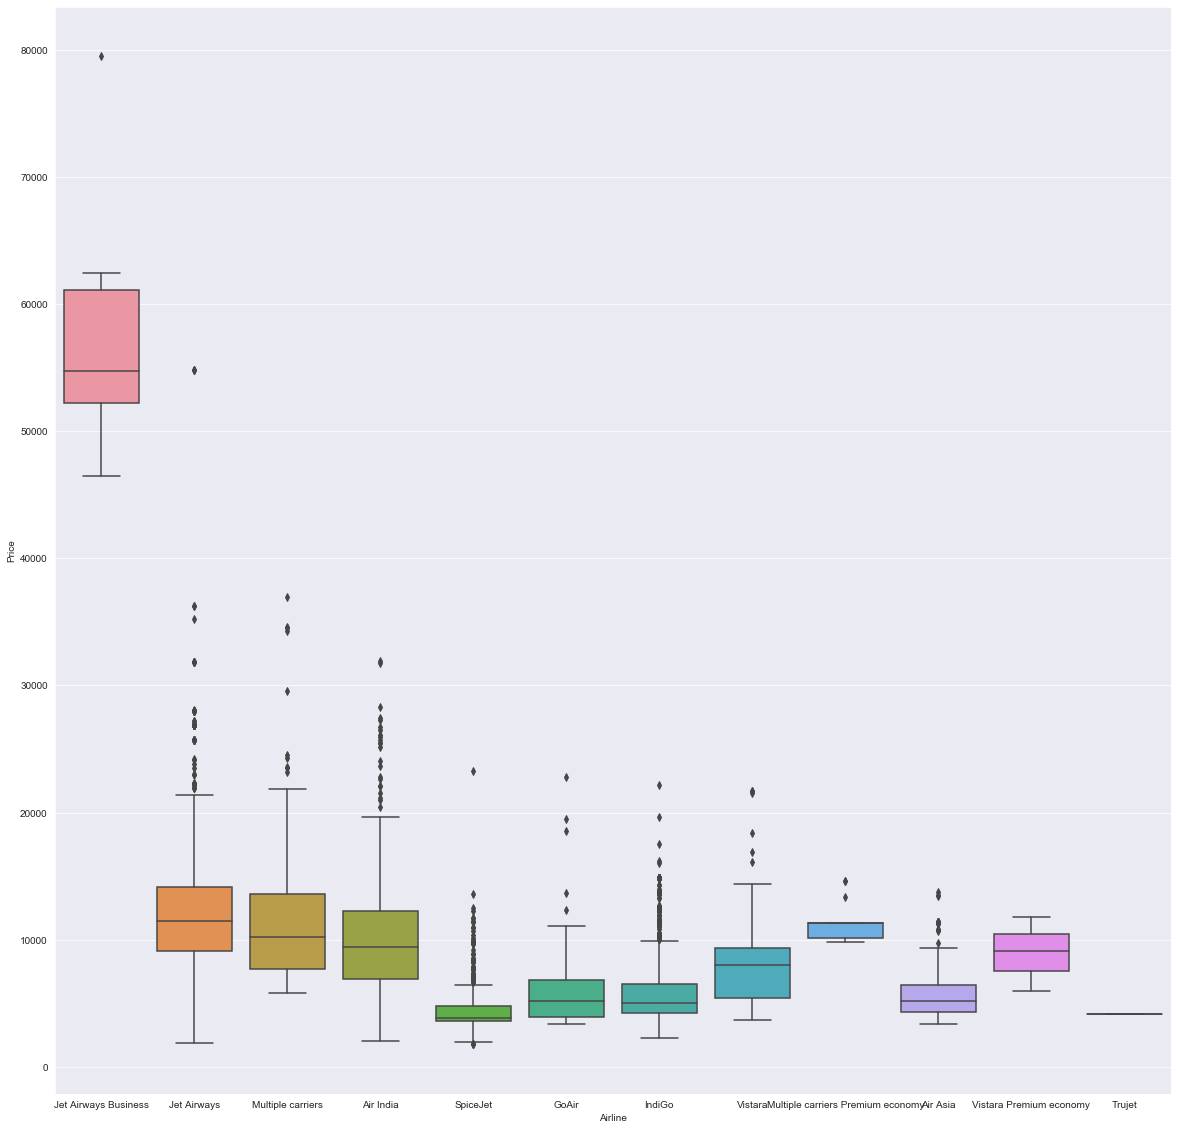

In [54]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Airline',y='Price',data=Data.sort_values('Price',ascending=False))

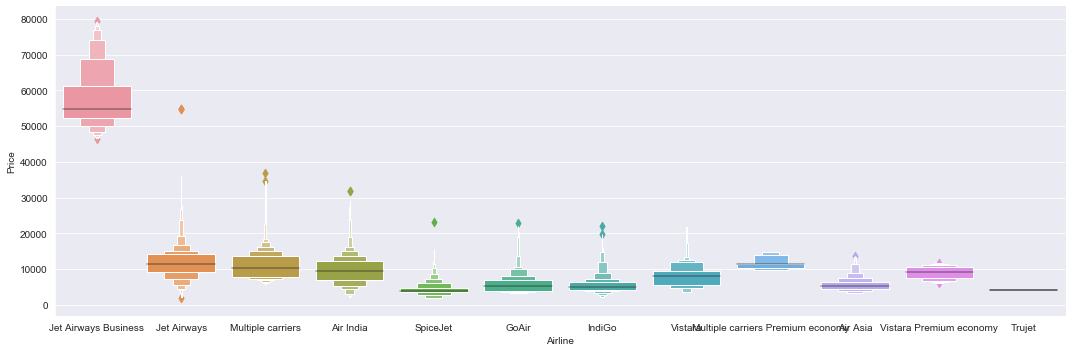

In [55]:
sns.catplot(x='Airline',y='Price',data=Data.sort_values('Price',ascending=False),height=5,aspect=3,kind='boxen')

In [56]:
Airline=pd.get_dummies(Data[['Airline']],drop_first=True)

In [57]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [58]:
Data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10683, dtype: object

In [59]:
Data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

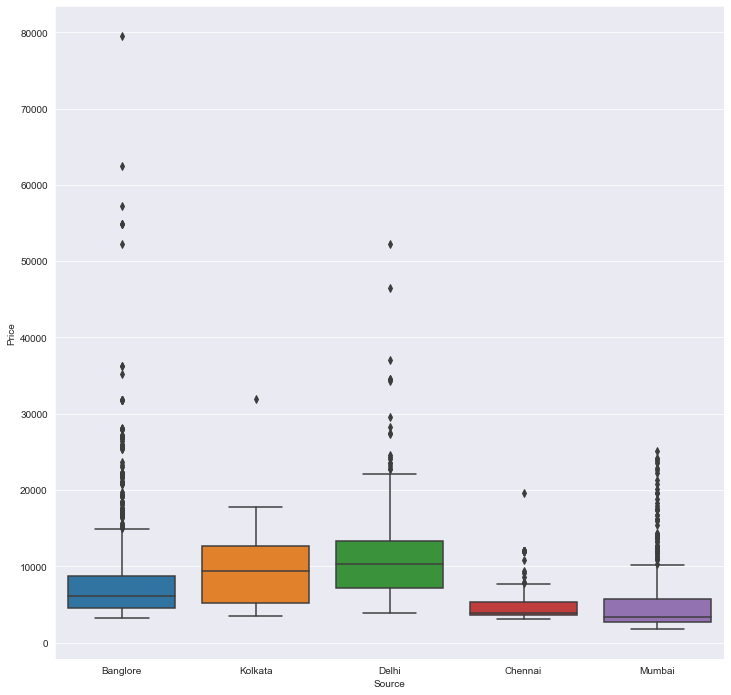

In [60]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Source',y='Price',data=Data)

In [61]:
Source = pd.get_dummies(Data[['Source']], drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [62]:
Data['Destination']

0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10683, dtype: object

In [63]:
Data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

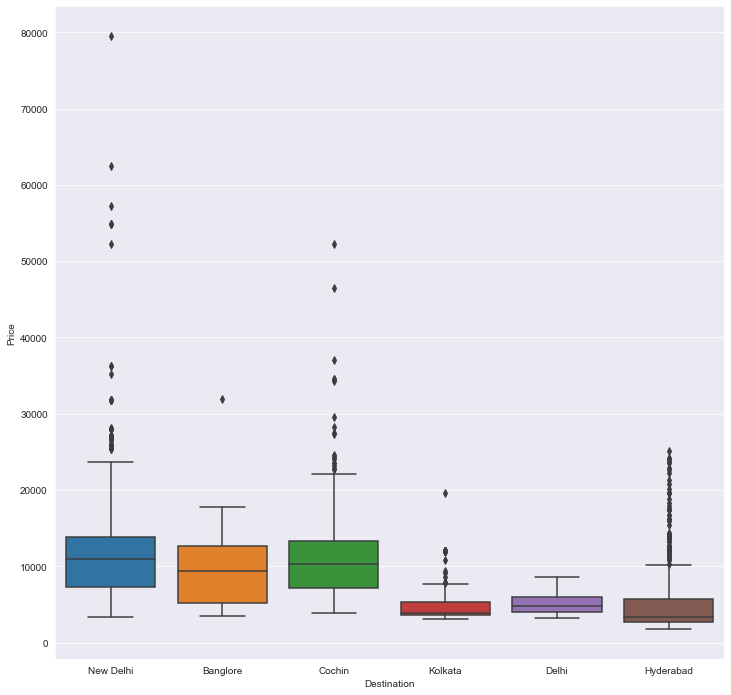

In [64]:
plt.figure(figsize=(12,12))
sns.boxplot(x='Destination',y='Price',data=Data)

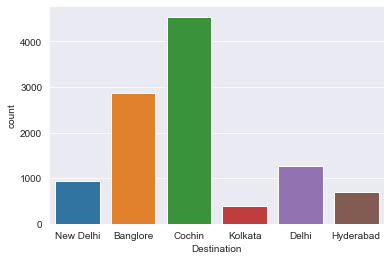

In [65]:
sns.countplot(x='Destination',data=Data)

In [66]:
Destination = pd.get_dummies(Data[["Destination"]], drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [67]:
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


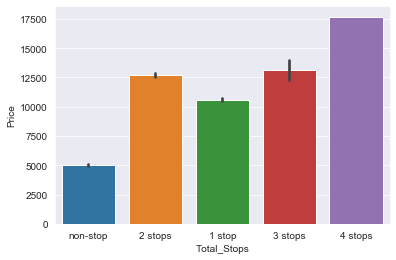

In [68]:
sns.barplot(x='Total_Stops',y='Price',data=Data)

In [69]:
Dict={
 "non-stop": 0, 
 "1 stop": 1, 
 "2 stops": 2, 
 "3 stops": 3, 
 "4 stops": 4   
}

In [70]:
Data['Total_Stops']=[Dict[i] for i in Data['Total_Stops']]

In [71]:
Data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: int64

In [72]:
Data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,4,9,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,3,1,14,10,11,30,2,40


In [73]:
Train_Data=pd.concat([Data,Airline,Source,Destination],axis=1)

In [74]:
Train_Data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,4,9,22,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,23,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,11,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,3,1,14,...,0,0,0,0,0,0,0,0,0,1


In [75]:
Train_Data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [76]:
Train_Data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [77]:
Train_Data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [78]:
Train_Data

,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration_Hour,Duration_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,22,25,19,55,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,23,20,20,45,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,11,20,8,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,3,1,14,10,11,30,2,40,...,0,0,0,0,0,0,0,0,0,1


In [79]:
Test_Data=pd.read_excel('Test_Set.xlsx')

In [80]:
Test_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [81]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [82]:
Test_Data.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [83]:
Test_Data['Journey_Day']=pd.to_datetime(Test_Data['Date_of_Journey']).dt.day
Test_Data['Journey_Month']=pd.to_datetime(Test_Data['Date_of_Journey']).dt.month
Test_Data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [84]:
Test_Data["Arrival_Hour"] = pd.to_datetime(Test_Data["Arrival_Time"]).dt.hour
Test_Data["Arrival_Min"] = pd.to_datetime(Test_Data["Arrival_Time"]).dt.minute
Test_Data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [85]:
Test_Data["Dept_Hour"] = pd.to_datetime(Test_Data["Dep_Time"]).dt.hour
Test_Data["Dept_Min"] = pd.to_datetime(Test_Data["Dep_Time"]).dt.minute
Test_Data.drop(["Dep_Time"], axis = 1, inplace = True)

In [86]:
Duration = list(Test_Data["Duration"])

for i in range(len(Duration)):
    if len(Duration[i].split()) != 2:    
        if "h" in Duration[i]:
            Duration[i] = Duration[i].strip() + " 0m"   
        else:
            Duration[i] = "0h " + Duration[i] 

In [87]:
Duration_Hour = []
Duration_Min = []

In [88]:
for i in range(len(Duration)):
    Duration_Hour.append(Dur[i].split('h')[0])

In [89]:
Test_Data['Duration_Hour']=Duration_Hour 

In [90]:
for i in range(len(Duration)):
    Duration_Min.append(Duration[i].split('m')[0].split()[-1])

In [91]:
Test_Data['Duration_Min']=Duration_Min

In [92]:
Test_Data.drop('Duration',axis=1,inplace=True)

In [93]:
Airline = pd.get_dummies(Test_Data[['Airline']],drop_first=True)
Source = pd.get_dummies(Test_Data[['Source']], drop_first=True)
Destination = pd.get_dummies(Test_Data[['Destination']], drop_first=True)

In [94]:
Test_Data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [95]:
Test_Data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [96]:
Test_Data=pd.concat([Test_Data, Airline, Source, Destination], axis = 1)

In [97]:
Test_Data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [98]:
Test_Data

,Total_Stops,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration_Hour,Duration_Min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,4,25,17,30,2,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,10,20,6,20,7,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,19,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,5,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,4,50,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,25,20,30,27,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,16,55,14,20,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,3,6,4,25,21,50,20,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,3,6,19,15,4,0,2,15,1,...,0,0,1,0,0,1,0,0,0,0


In [99]:
Train_Data

,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration_Hour,Duration_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,22,25,19,55,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,23,20,20,45,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,11,20,8,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,3,1,14,10,11,30,2,40,...,0,0,0,0,0,0,0,0,0,1


In [100]:
Train_Data.shape

(10683, 30)

In [101]:
X=Train_Data.drop('Price',axis=1)

In [102]:
X

,Total_Stops,Journey_Day,Journey_Month,Arrival_Hour,Arrival_Min,Dept_Hour,Dept_Min,Duration_Hour,Duration_Min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,1,10,22,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,13,15,5,50,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,4,25,9,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,23,30,18,5,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,21,35,16,50,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4,9,22,25,19,55,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,23,20,20,45,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,11,20,8,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,3,1,14,10,11,30,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [103]:
y=Train_Data['Price']

In [104]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

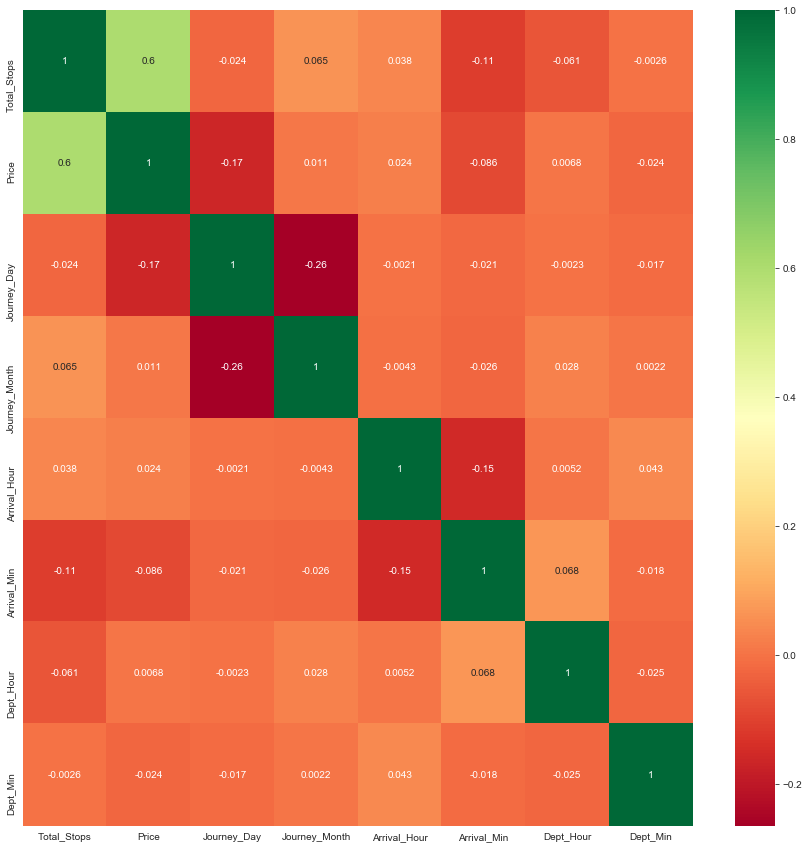

In [105]:
plt.figure(figsize = (15,15))
sns.heatmap(Data.corr(),annot = True,cmap = "RdYlGn")
plt.show()

In [106]:
from sklearn.ensemble import ExtraTreesRegressor

In [107]:
Model=ExtraTreesRegressor()

In [108]:
Model.fit(X,y)

ExtraTreesRegressor()

In [109]:
Model.feature_importances_

array([2.40873913e-01, 1.08540339e-01, 8.50522022e-02, 3.01720849e-02,
       2.12739300e-02, 2.46405371e-02, 2.17525202e-02, 1.22515909e-01,
       1.77183562e-02, 9.73854439e-03, 1.80115952e-03, 1.73597806e-02,
       1.29751370e-01, 6.71911133e-02, 1.90429007e-02, 9.95156188e-04,
       3.09931632e-03, 8.65296409e-05, 5.13971115e-03, 1.49046658e-04,
       5.15158755e-04, 9.63315112e-03, 4.26466771e-03, 7.09642710e-03,
       8.92173111e-03, 1.41262455e-02, 5.04214753e-03, 5.56076980e-04,
       2.29499737e-02])

In [110]:
Ranked_Features=pd.Series(Model.feature_importances_,index=X.columns)
Ranked_Features

Total_Stops                                  0.240874
Journey_Day                                  0.108540
Journey_Month                                0.085052
Arrival_Hour                                 0.030172
Arrival_Min                                  0.021274
Dept_Hour                                    0.024641
Dept_Min                                     0.021753
Duration_Hour                                0.122516
Duration_Min                                 0.017718
Airline_Air India                            0.009739
Airline_GoAir                                0.001801
Airline_IndiGo                               0.017360
Airline_Jet Airways                          0.129751
Airline_Jet Airways Business                 0.067191
Airline_Multiple carriers                    0.019043
Airline_Multiple carriers Premium economy    0.000995
Airline_SpiceJet                             0.003099
Airline_Trujet                               0.000087
Airline_Vistara             

In [111]:
Ranked_Features.nlargest(20)

Total_Stops                     0.240874
Airline_Jet Airways             0.129751
Duration_Hour                   0.122516
Journey_Day                     0.108540
Journey_Month                   0.085052
Airline_Jet Airways Business    0.067191
Arrival_Hour                    0.030172
Dept_Hour                       0.024641
Destination_New Delhi           0.022950
Dept_Min                        0.021753
Arrival_Min                     0.021274
Airline_Multiple carriers       0.019043
Duration_Min                    0.017718
Airline_IndiGo                  0.017360
Destination_Delhi               0.014126
Airline_Air India               0.009739
Source_Delhi                    0.009633
Destination_Cochin              0.008922
Source_Mumbai                   0.007096
Airline_Vistara                 0.005140
dtype: float64

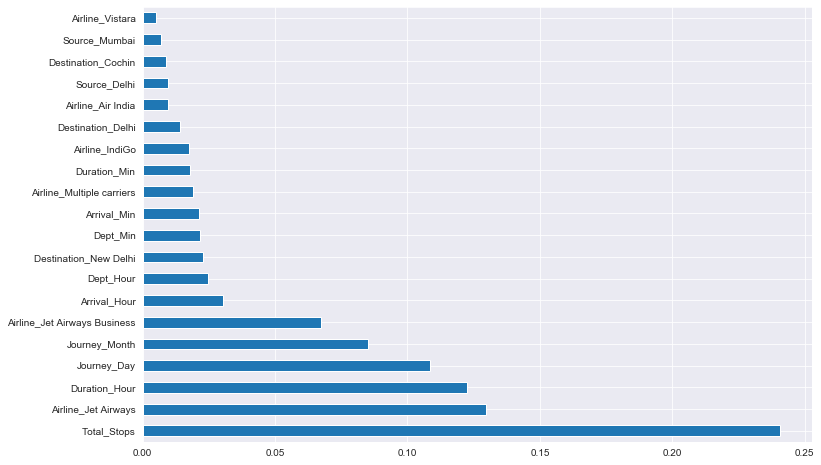

In [112]:
plt.figure(figsize = (12,8))
Ranked_Features.nlargest(20).plot(kind='barh')

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
RFR=RandomForestRegressor()

In [117]:
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [118]:
y_pred=RFR.predict(X_test)

In [119]:
y_pred

array([14092.27416667,  6610.63      , 12411.18880952, ...,
        3513.54      ,  6364.9       , 15120.405     ])

In [120]:
y_test

6076    10844
3544     4959
7313    14781
5032     3858
2483    12898
        ...  
3022    13555
8417     7229
2605     3419
1392     5797
7855    15407
Name: Price, Length: 2671, dtype: int64

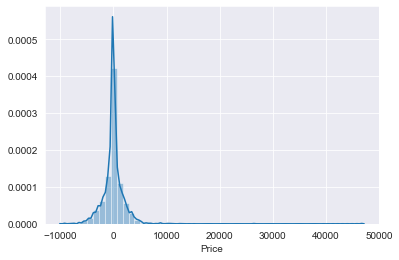

In [121]:
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'y_Pred')

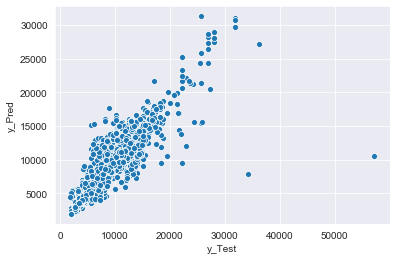

In [122]:
sns.scatterplot(y_test,y_pred)
plt.xlabel('y_Test')
plt.ylabel('y_Pred')

In [123]:
RFR.score(X_train,y_train)

0.9550406922366237

In [124]:
RFR.score(X_test,y_test)

0.7839141973890632

In [125]:
from sklearn import metrics

In [126]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1192.1731183207157
MSE: 4414065.709472022
RMSE: 2100.967803054588


In [127]:
metrics.r2_score(y_test,y_pred)

0.7839141973890632

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
n_estimators = [int(x) for x in np.linspace(100,1500,15)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,100,10)]
min_samples_split = [2,5,7,10,15,25]
min_samples_leaf = [1,2,5,10]

In [130]:
Random_Grid={
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
            }

In [131]:
RF_Random = RandomizedSearchCV(estimator=RFR,param_distributions=Random_Grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [132]:
RF_Random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  27.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.3s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  26.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  27.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  29.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=15, total=  37.4s
[CV] n_estimators=600, min_samples_split=25, min_samples_leaf=10, max_features=auto, max_depth=78 
[CV]  n_estimators=600, min_samples_split=25, min_samples_leaf=10, max_features=auto, max_depth=78, total=  23.9s
[CV] n_estimators=600, min_samples_split=

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 17.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 15, 26, 36, 47, 57, 68,
                                                      78, 89, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 7, 10, 15,
                                                              25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [133]:
RF_Random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [134]:
y_pred=RF_Random.predict(X_test)

In [135]:
y_pred

array([13082.69605736,  6412.45420966, 12738.55576128, ...,
        3920.68806135,  6939.57994325, 14483.03415362])

In [136]:
y_test

6076    10844
3544     4959
7313    14781
5032     3858
2483    12898
        ...  
3022    13555
8417     7229
2605     3419
1392     5797
7855    15407
Name: Price, Length: 2671, dtype: int64

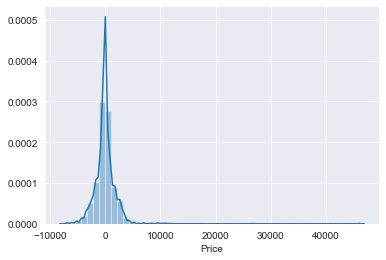

In [137]:
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'y_Pred')

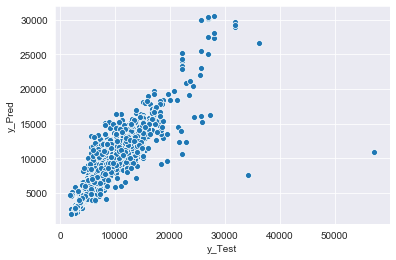

In [138]:
sns.scatterplot(y_test,y_pred)
plt.xlabel('y_Test')
plt.ylabel('y_Pred')

In [139]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1164.981583136044
MSE: 3992430.0773321665
RMSE: 1998.1066231140335


In [140]:
metrics.r2_score(y_test,y_pred)

0.8045549127696252

In [141]:
import pickle

In [142]:
File=open('Flight_Fare.pkl','wb')
pickle.dump(RF_Random,File)

In [143]:
Model=open('Flight_Fare.pkl','rb')
RF=pickle.load(Model)

In [144]:
y_Pred=RF.predict(X_test)

In [145]:
metrics.r2_score(y_test,y_Pred)

0.8045549127696252

In [146]:
X_test.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Arrival_Hour',
       'Arrival_Min', 'Dept_Hour', 'Dept_Min', 'Duration_Hour', 'Duration_Min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')